# Import Package & Dataset

In [1]:
# import library
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv('GrandSNBT-cleaned.csv', index_col='RANKING')
df

,NAMA PESERTA,Prodi 1,Univ 1,Prodi 2,Univ 2,Prodi 3,Univ 3,Prodi 4,Univ 4,SKOR TRYOUT UTBK,GRADE,KETERANGAN
RANKING,,,,,,,,,,,,
1,Catriona Egalita,KEDOKTERAN,UGM,KEDOKTERAN,UNAIR,KEDOKTERAN,UNDIP,KEDOKTERAN,UNS,809,Superior,LULUS PILIHAN 1
2,Lea Annisa Rahmadhanti Miano,PSIKOLOGI,UGM,PSIKOLOGI,UNS,BAHASA INGGRIS UNTUK KOMUNIKASI BISNIS DAN PRO...,UPN V JAWA TIMUR,BAHASA INGGRIS UNTUK KOMUNIKASI BISNIS DAN PRO...,UPN V JAWA TIMUR,809,Superior,LULUS PILIHAN 1
3,Halsa Rosmadani Jaizati Rasyida,PERENCANAAN WILAYAH DAN KOTA,UGM,TEKNOLOGI PANGAN DAN HASIL PERTANIAN,UGM,GEOFISIKA,UGM,TEKNIK GEOLOGI,UGM,809,Superior,LULUS PILIHAN 1
4,Audy Rizkia Yuana,KEDOKTERAN,UGM,KEDOKTERAN,UNS,KEDOKTERAN,UNDIP,PENDIDIKAN DOKTER,UNSOED,809,Superior,LULUS PILIHAN 1
5,Arella Shayna Maritza,ARSITEKTUR,UGM,PERENCANAAN WILAYAH DAN KOTA,UGM,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,809,Superior,LULUS PILIHAN 1
...,...,...,...,...,...,...,...,...,...,...,...,...
13057,Blitzda Alusja,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,269,C,AYO BELAJAR LAGI
13058,Velisa Reika Junitha,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,269,C,AYO BELAJAR LAGI
13059,Adinda Fathiyah Hanani,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,269,C,AYO BELAJAR LAGI


# Data Understanding

In [3]:
# check data type and status null (missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13061 entries, 1 to 13061
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAMA PESERTA      13061 non-null  object
 1   Prodi 1           13061 non-null  object
 2   Univ 1            13061 non-null  object
 3   Prodi 2           13061 non-null  object
 4   Univ 2            13061 non-null  object
 5   Prodi 3           13061 non-null  object
 6   Univ 3            13061 non-null  object
 7   Prodi 4           13061 non-null  object
 8   Univ 4            13061 non-null  object
 9   SKOR TRYOUT UTBK  13061 non-null  int64 
 10  GRADE             13061 non-null  object
 11  KETERANGAN        13061 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.3+ MB


In [4]:
# fix calumns name format for easily to use
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['nama_peserta', 'prodi_1', 'univ_1', 'prodi_2', 'univ_2', 'prodi_3',
       'univ_3', 'prodi_4', 'univ_4', 'skor_tryout_utbk', 'grade',
       'keterangan'],
      dtype='object')

In [5]:
df['skor_tryout_utbk'].max() # maximum skor

809

In [6]:
df['skor_tryout_utbk'].min() # minimum skor

269

<AxesSubplot:>

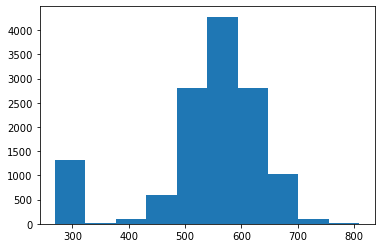

In [7]:
df['skor_tryout_utbk'].hist(grid=False) # show the histogram plot for skor tryout

<AxesSubplot:>

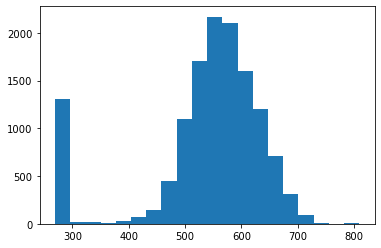

In [8]:
df['skor_tryout_utbk'].hist(grid=False, bins=20) 

<AxesSubplot:>

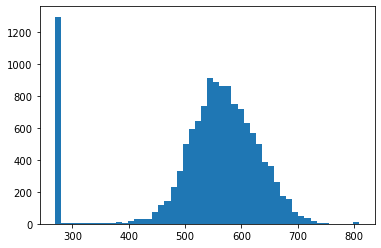

In [9]:
df['skor_tryout_utbk'].hist(grid=False, bins=50)

## note !!
here we found the unormaly data, and we dont know why the data skor was like that. 
so, we decided to found out why does this data have the oddities

In [10]:
df[df['skor_tryout_utbk'] == (df['skor_tryout_utbk'].min())] # see the data that have the minimal score

,nama_peserta,prodi_1,univ_1,prodi_2,univ_2,prodi_3,univ_3,prodi_4,univ_4,skor_tryout_utbk,grade,keterangan
RANKING,,,,,,,,,,,,
11776,Puan Bening,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,269,C,AYO BELAJAR LAGI
11777,Febriani,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,269,C,AYO BELAJAR LAGI
11778,Ilma Kamaliya,KEDOKTERAN,UNDIP,KEDOKTERAN,UB,KEDOKTERAN,UNS,KEDOKTERAN,UPN V JAWA TIMUR,269,C,AYO BELAJAR LAGI
11779,Sholiha Alfia,ADMINISTRASI ASURANSI DAN AKTUARIA-DIPLOMA IV,UI,ADMINISTRASI BISNIS,UNDIP,ADMINISTRASI BISNIS,UPN V JAWA TIMUR,ADMINISTRASI BISNIS PSDKU PANGANDARAN,UNPAD,269,C,AYO BELAJAR LAGI
11780,Rafi,ILMU HUBUNGAN INTERNASIONAL,UI,PRODUKSI MEDIA--DIPLOMA IV,UI,PERIKLANAN KREATIF--DIPLOMA IV,UI,ILMU KOMUNIKASI,UNDIP,269,C,AYO BELAJAR LAGI
...,...,...,...,...,...,...,...,...,...,...,...,...
13057,Blitzda Alusja,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,269,C,AYO BELAJAR LAGI
13058,Velisa Reika Junitha,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,269,C,AYO BELAJAR LAGI
13059,Adinda Fathiyah Hanani,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,269,C,AYO BELAJAR LAGI


In [11]:
df[df['skor_tryout_utbk'] == (df['skor_tryout_utbk'].min())].shape[0] # get the count of that data

1286

In [12]:
# show the data that have minimal score and dont have prodi 1, 2, 3 and 4
df[(df['prodi_1']=='TIDAK MEMILIH') & (df['prodi_2']=='TIDAK MEMILIH') & (df['prodi_3']=='TIDAK MEMILIH') & (df['prodi_4']=='TIDAK MEMILIH') & (df['skor_tryout_utbk']==df['skor_tryout_utbk'].min())]

,nama_peserta,prodi_1,univ_1,prodi_2,univ_2,prodi_3,univ_3,prodi_4,univ_4,skor_tryout_utbk,grade,keterangan
RANKING,,,,,,,,,,,,
11776,Puan Bening,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,269,C,AYO BELAJAR LAGI
11777,Febriani,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,269,C,AYO BELAJAR LAGI
11782,Johan Prasettya,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,269,C,AYO BELAJAR LAGI
11783,Zambert Blaster,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,269,C,AYO BELAJAR LAGI
11786,Kevin Satria,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,269,C,AYO BELAJAR LAGI
...,...,...,...,...,...,...,...,...,...,...,...,...
13057,Blitzda Alusja,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,269,C,AYO BELAJAR LAGI
13058,Velisa Reika Junitha,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,269,C,AYO BELAJAR LAGI
13059,Adinda Fathiyah Hanani,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,269,C,AYO BELAJAR LAGI


### note
next step is delete the data that have minimal score and dont have major at all

In [13]:
# drop colums
df.drop(df[(df['prodi_1']=='TIDAK MEMILIH') & (df['prodi_2']=='TIDAK MEMILIH') & (df['prodi_3']=='TIDAK MEMILIH') & (df['prodi_4']=='TIDAK MEMILIH') & (df['skor_tryout_utbk']==df['skor_tryout_utbk'].min())].index,axis=0, inplace=True)

In [14]:
# cek dataset was delated
df[(df['prodi_1']=='TIDAK MEMILIH') & (df['prodi_2']=='TIDAK MEMILIH') & (df['prodi_3']=='TIDAK MEMILIH') & (df['prodi_4']=='TIDAK MEMILIH') & (df['skor_tryout_utbk']==df['skor_tryout_utbk'].min())]


,nama_peserta,prodi_1,univ_1,prodi_2,univ_2,prodi_3,univ_3,prodi_4,univ_4,skor_tryout_utbk,grade,keterangan
RANKING,,,,,,,,,,,,


<AxesSubplot:>

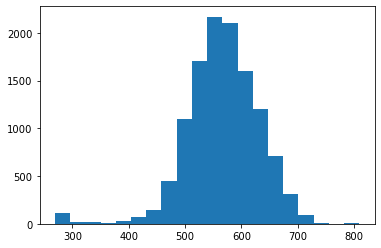

In [15]:
df['skor_tryout_utbk'].hist(grid=False, bins=20) # check the histogram again

### note !!
i have idea to add colum status, where members are accepted
#### for analyst easily

In [16]:
df['keterangan'].unique() # see the unique value for 'KETERANGAN' colums

array(['LULUS PILIHAN 1', 'LULUS PILIHAN 2', 'LULUS PILIHAN 4',
       'LULUS PILIHAN 3', 'AYO BELAJAR LAGI'], dtype=object)

In [17]:
def getStatus(col): # make the fungction for use to get the dtatus fof the data
    prodi=[]
    univ=[]
    for d in col.index :
        if df.loc[d,'keterangan'][-1]=='1':
            prodi.append(df.loc[d,'prodi_1'])
            univ.append(df.loc[d,'univ_1'])
        elif df.loc[d,'keterangan'][-1]=='2':
            prodi.append(df.loc[d,'prodi_2'])
            univ.append(df.loc[d,'univ_2'])
        elif df.loc[d,'keterangan'][-1]=='3':
            prodi.append(df.loc[d,'prodi_3'])
            univ.append(df.loc[d,'univ_3'])
        elif df.loc[d,'keterangan'][-1]=='4':
            prodi.append(df.loc[d,'prodi_4'])
            univ.append(df.loc[d,'univ_4'])
        else:
            prodi.append('-')
            univ.append('-')
    return prodi, univ

In [18]:
p, u = getStatus(df['keterangan']) # execute the fungction

In [19]:
df['prodi'] = p
df['univ'] = u

In [20]:
df.sample(10)

,nama_peserta,prodi_1,univ_1,prodi_2,univ_2,prodi_3,univ_3,prodi_4,univ_4,skor_tryout_utbk,grade,keterangan,prodi,univ
RANKING,,,,,,,,,,,,,,
742,Cintia Sabila Anggraini,SAINS AKTUARIA,ITS,STATISTIKA,ITS,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,TIDAK MEMILIH,659,A,LULUS PILIHAN 1,SAINS AKTUARIA,ITS
5562,Ridho Putra Alansyah,HUKUM,UNDIP,HUKUM,UGM,INFORMATIKA,UNDIP,TEKNIK INFORMATIKA,UB,572,B,AYO BELAJAR LAGI,-,-
5536,Oktavia Dwi Ramadhani,ILMU KOMUNIKASI,UNDIP,ADMINISTRASI PUBLIK,UNDIP,HUBUNGAN MASYARAKAT-DIPLOMA III,UNDIP,INFORMASI DAN HUMAS-DIPLOMA IV,UNDIP,572,B,LULUS PILIHAN 3,HUBUNGAN MASYARAKAT-DIPLOMA III,UNDIP
3273,Arkan Ayyasy,FAK. TEKNIK PERTAMB. & PERMINYAKAN (FTTM),ITB,TEKNIK GEOLOGI,UGM,BAHASA INGGRIS UNTUK KOMUNIKASI BISNIS DAN PRO...,UPN V JAWA TIMUR,BAHASA INGGRIS UNTUK KOMUNIKASI BISNIS DAN PRO...,UPN V JAWA TIMUR,603,A,LULUS PILIHAN 3,BAHASA INGGRIS UNTUK KOMUNIKASI BISNIS DAN PRO...,UPN V JAWA TIMUR
6935,Fahreza Ardhana,TEKNIK ELEKTRO,UGM,ILMU HUKUM,UNS,MANAJEMEN BISNIS,UNS,BISNIS DIGITAL,UNS,554,B,AYO BELAJAR LAGI,-,-
8391,Amanda Kesara Achmad,MANAJEMEN,UPN VETERAN JOGJA,MANAJEMEN,UNJ,PENDIDIKAN VOKASIONAL TATA RIAS,UNJ,BAHASA INGGRIS UNTUK KOMUNIKASI BISNIS DAN PRO...,UPN V JAWA TIMUR,536,B,AYO BELAJAR LAGI,-,-
2029,Mierelle Cornelia,ILMU KESEHATAN MASYARAKAT,UI,KESEHATAN MASYARAKAT,UPN VETERAN JAKARTA,KESEHATAN MASYARAKAT,UNDIP,BAHASA INGGRIS UNTUK KOMUNIKASI BISNIS DAN PRO...,UPN V JAWA TIMUR,625,A,LULUS PILIHAN 4,BAHASA INGGRIS UNTUK KOMUNIKASI BISNIS DAN PRO...,UPN V JAWA TIMUR
7246,Ridho Saputra,ILMU KOMUNIKASI,UPN V JAWA TIMUR,ADMINISTRASI PUBLIK,UPN V JAWA TIMUR,ILMU HUKUM,UNS,AKUNTANSI,UNS,550,B,AYO BELAJAR LAGI,-,-
11802,Anwar Mulia Lubis,HUKUM,USU,ILMU KEOLAHRAGAAN,UM,BAHASA INGGRIS UNTUK KOMUNIKASI BISNIS DAN PRO...,UPN V JAWA TIMUR,BAHASA INGGRIS UNTUK KOMUNIKASI BISNIS DAN PRO...,UPN V JAWA TIMUR,269,C,AYO BELAJAR LAGI,-,-


## Data Visualization

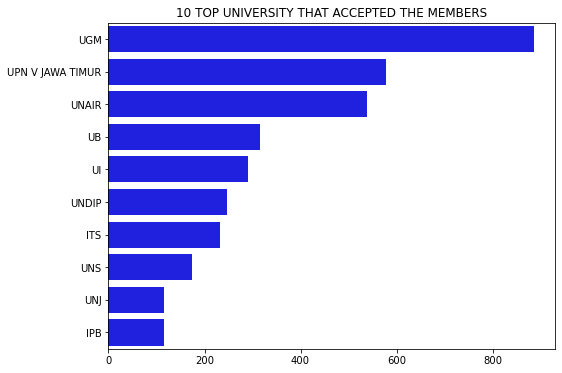

In [21]:
# make the visualization of univ status
vc_univ = df[df['univ']!='-']['univ'].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=vc_univ.values, y=vc_univ.index, color='blue')
plt.title('10 TOP UNIVERSITY THAT ACCEPTED THE MEMBERS')
plt.show()

In [22]:
univ10 = vc_univ.index

In [23]:
# make the visualization of the average score members that accept that university
avrg_score = {}
univ = []
score = []
for u in univ10:  
    dfu = df[df['univ']==u]
    avrg = dfu['skor_tryout_utbk'].mean()
    univ.append(u)
    score.append(avrg)
    
avrg_score['univ'] = univ
avrg_score['score'] = score

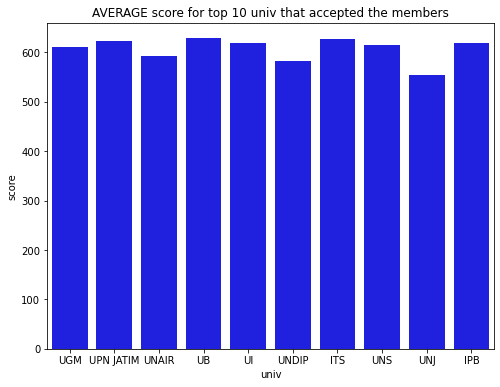

In [24]:
avrg_score = pd.DataFrame(avrg_score) # make the fata frame
avrg_score.loc[1,'univ'] = 'UPN JATIM'

# make te barplot visualization
plt.figure(figsize=(8,6))
sns.barplot(x='univ', y='score', data=avrg_score, color='blue')
plt.title('AVERAGE score for top 10 univ that accepted the members')
plt.show()

In [25]:
# make a visualization for get the top 10 favorit university
df_univ = df[['univ_1','univ_2','univ_3','univ_4']]
data_univ = []

for i in df_univ.index:
    row = df_univ.loc[i,:].to_list()
    data_univ.append(row[0])
    for d in row[1:]:
        if d == data_univ[-1]:
            continue
        else:
            data_univ.append(d)

data_univ = [i for i in data_univ if i != 'TIDAK MEMILIH']

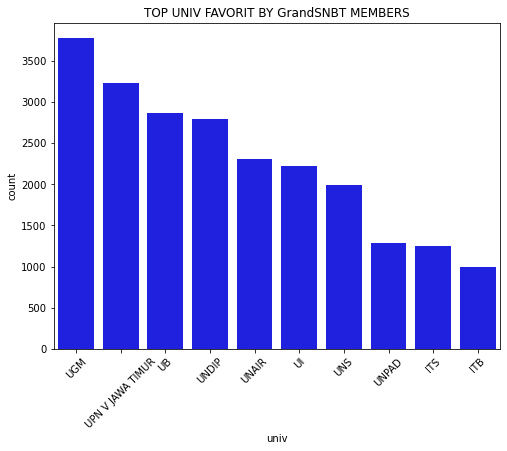

In [26]:
fav_univ = pd.DataFrame({'univ':data_univ})
top10_fav_univ = fav_univ.value_counts().to_frame('count').reset_index().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x='univ',y='count' ,data=top10_fav_univ, color='blue')
plt.title('TOP UNIV FAVORIT BY GrandSNBT MEMBERS')
plt.xticks(rotation=45)
plt.show()

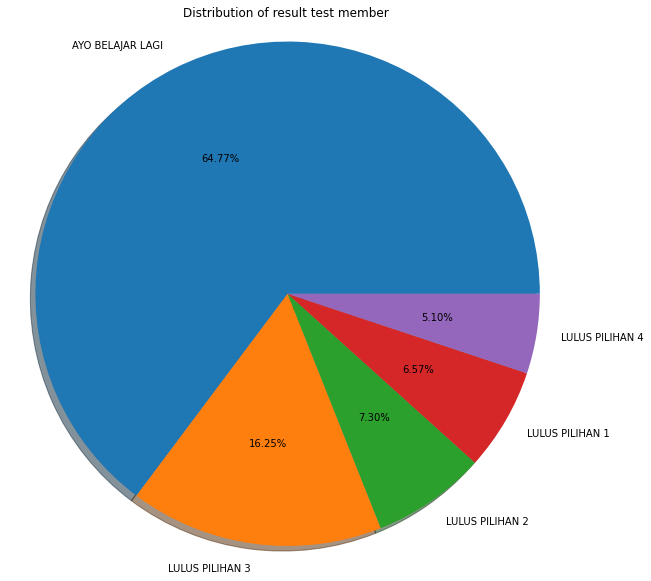

In [34]:
data_pie = df['keterangan'].value_counts()

plt.figure(figsize=(10,10))
plt.pie(data_pie.values, labels=data_pie.index, autopct='%1.2f%%',shadow=True)
plt.title('Distribution of result test member')
plt.axis('equal')
plt.show()